In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.set()


In [2]:
df=pd.read_csv("/content/heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### iwill explain the columns of our dataframe  and its effect to have heart disease :

1.  age : the age of people and heart disease increase by getting older in age as cumlative effects of risk factors over time
2. sex: which is gender of people and male in genral way have more chance to have heart disease than female but this gap decrease as female reach the menopause
3. cp (chest pain): we have 4 values of it 0:asymptomatic which there is no chest pain ,1:typical angina : its  classic type from chest pain in it the heart may not have oxygen reach it and that pain offten occure in center of heart  , 2:atypical angina :there is chest pain in different places in heart ,3:non-angina :its realy related to heart diseas it often related to panic attack or anixity ,the typical angina is the most related to heart disease
4. trestbps (resting blood pressure): its blood pressure during rest and as it increase the heart disease increase and it can dystroy artries overtime
5. chol(serum cholestrol): as the cholestrol increase it increase blocking blood artiries which is not direct reason for heart diseas
6. fbs(festing blood pressure): it used to measure diebates in blood and its main reson for heart diseases
7. restecg: its heart rate visulztion during rest and ST-T wave and type 2 are most reasons for heart disease
8. thalach (max heart rate acheived): its max heart rate reached during trainning and as its deacrease its lead to poorer cardiovascular fitness and potinal heart disease
9. exang(exriecese induced angina): its angina (الزبحه الصدريه ) that happen during trainning it mean that heart dont recive oxygen enough during training and its reason for heart diseases
10. oldpeak: it mean that blood didnt reach heart enough during training
11. slope : its slope peak exerices 0:unslopping ,1:float and 2:downslopping ,float and downslopping they are most reasons for heart disease
12. ca: its number of colored major vessels by fluoroscopy and number of this vessels ranges between 0-3 and as number of this vessels increase it mean there is heart disease
13. thal(thalassemia): if its fixed or reversible defect and its reason for heart disease
14. our target if person have heart disease(1) or not (0)



In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)
df_=df.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
df.replace({'sex':{1:'Male',0:'Female'}},inplace=True)
df.replace({'target':{0:'normal',1:'have heart disease'}},inplace=True)

<ipython-input-11-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

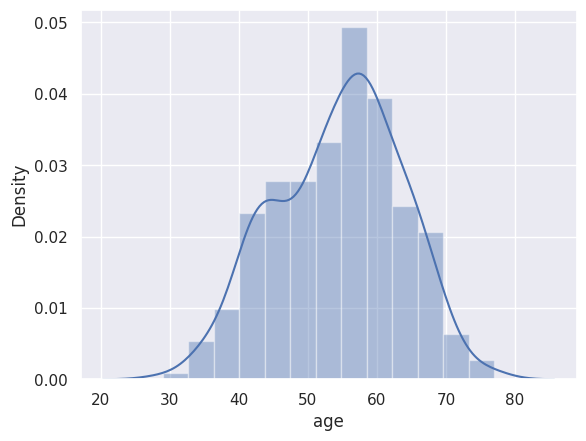

In [11]:
sns.distplot(df['age'])

In [12]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,have heart disease
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,have heart disease


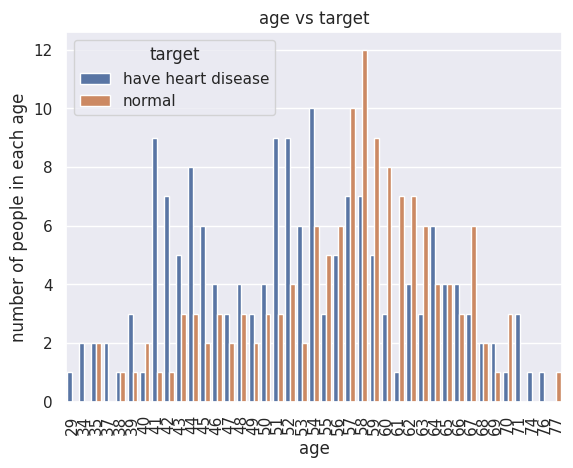

In [13]:
# iwant to see as age increase number of people with heart disease increase or decrease
sns.countplot(x='age',hue='target',data=df)
plt.xticks(rotation=90)
plt.xlabel("age")
plt.ylabel("number of people in each age")
plt.title('age vs target')
plt.show();

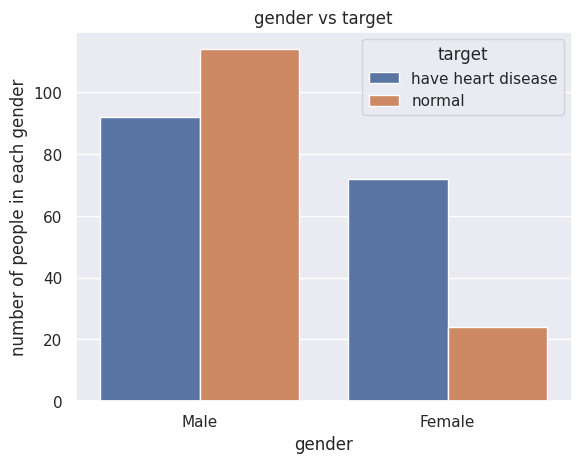

In [14]:
# i want to see if gender effect heart diseases
sns.countplot(x='sex',hue='target',data=df)
plt.xlabel("gender")
plt.ylabel("number of people in each gender")
plt.title('gender vs target')
plt.show();

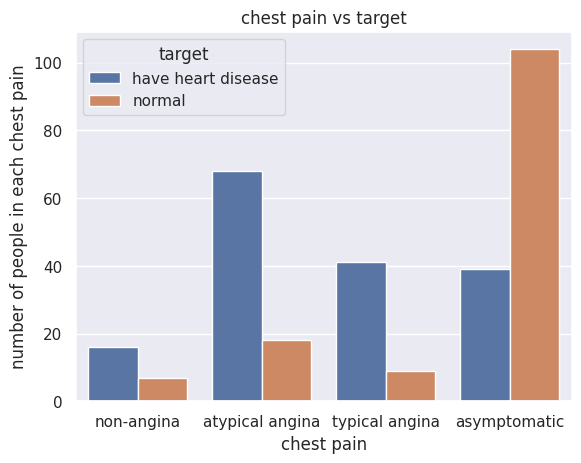

In [15]:
# iwant to see chest pain effect of heart diseases
df.replace({'cp':{0:'asymptomatic',1:'typical angina',2:'atypical angina',3:'non-angina'}},inplace=True)
sns.countplot(x='cp',hue='target',data=df)
plt.xlabel("chest pain")
plt.ylabel("number of people in each chest pain")
plt.title('chest pain vs target')
plt.show();

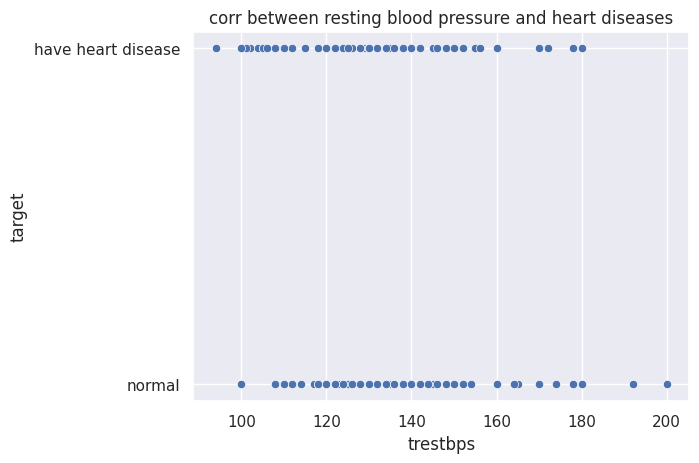

In [16]:
# iwant to see resting blood pressure effect heart diseases or not
sns.scatterplot(x=df['trestbps'],y=df['target'])
plt.title('corr between resting blood pressure and heart diseases')
plt.show();

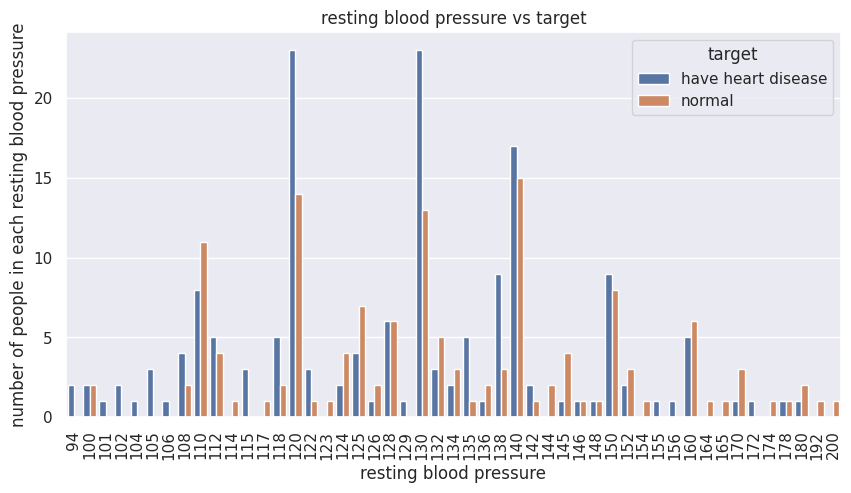

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='trestbps',hue='target',data=df)
plt.xlabel("resting blood pressure")
plt.ylabel("number of people in each resting blood pressure")
plt.title('resting blood pressure vs target')
plt.xticks(rotation=90)
plt.show();

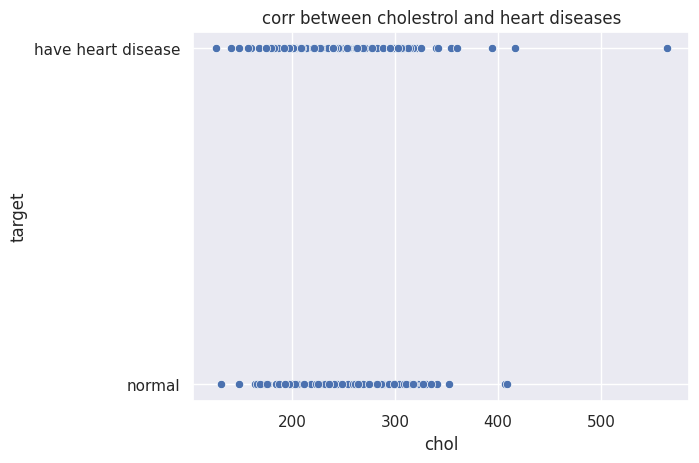

In [18]:
# iwant to see chorostrol effect on heart disease
sns.scatterplot(x=df['chol'],y=df['target'])
plt.title('corr between cholestrol and heart diseases')
plt.show();

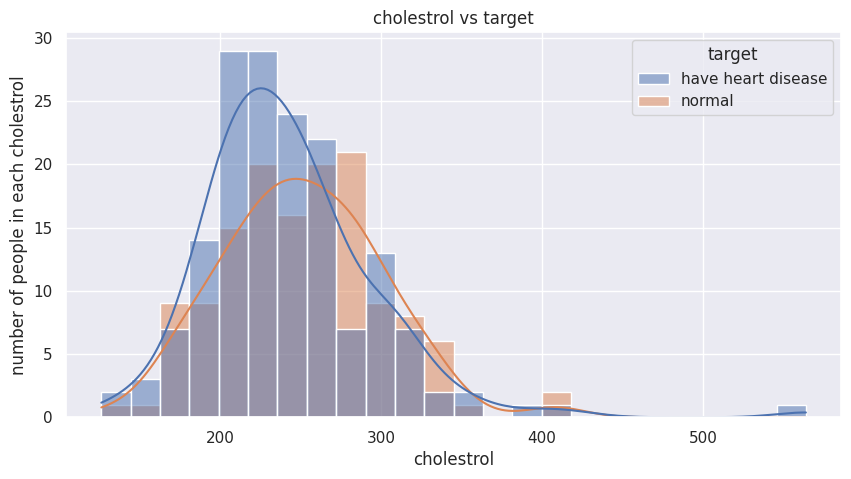

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(x='chol',hue='target',kde=True,data=df)
plt.xlabel("cholestrol")
plt.ylabel("number of people in each cholestrol")
plt.title('cholestrol vs target')
plt.show();

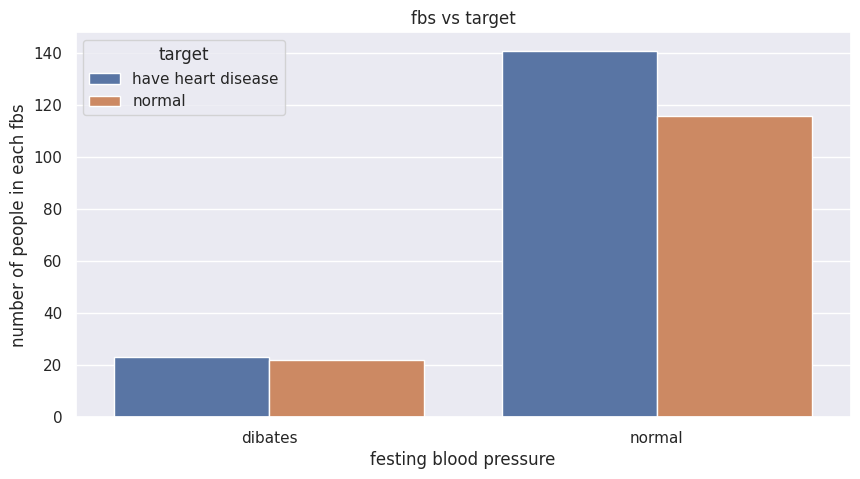

In [20]:
# i want to see effect of festing blood pressure (dibates) on heart disease
df.replace({'fbs':{0:'normal',1:'dibates'}},inplace=True)
plt.figure(figsize=(10,5))
sns.countplot(x='fbs',hue='target',data=df)
plt.xlabel("festing blood pressure")
plt.ylabel("number of people in each fbs")
plt.title('fbs vs target')
plt.show();

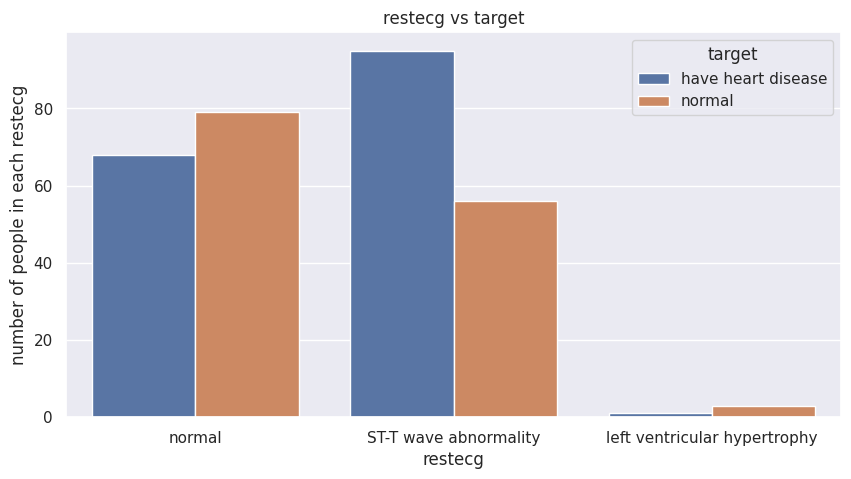

In [21]:
# i want to see effect of restecg on heart diseases
df.replace({'restecg':{0:'normal',1:'ST-T wave abnormality',2:'left ventricular hypertrophy'}},inplace=True)
plt.figure(figsize=(10,5))
sns.countplot(x='restecg',hue='target',data=df)
plt.xlabel("restecg")
plt.ylabel("number of people in each restecg")
plt.title('restecg vs target')
plt.show();

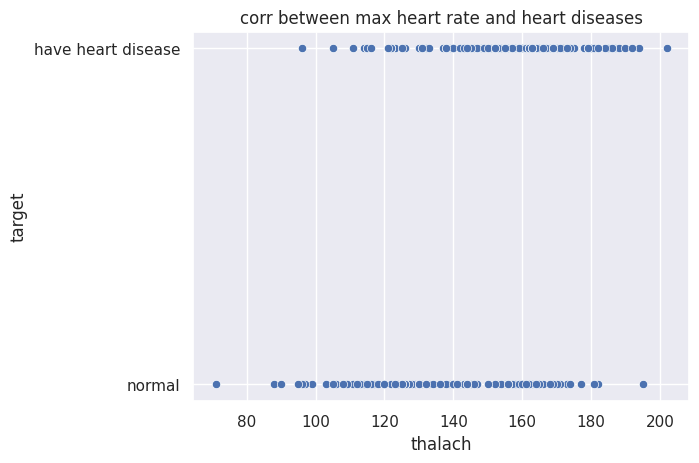

In [22]:
# i want to see effect of max heart rate reached during exrecise on heart diseases
sns.scatterplot(x=df['thalach'],y=df['target'])
plt.title('corr between max heart rate and heart diseases')
plt.show();

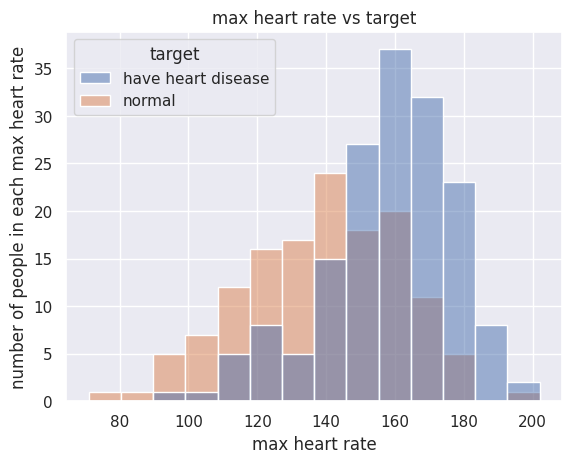

In [23]:
sns.histplot(x='thalach',hue='target',data=df)
plt.xlabel("max heart rate")
plt.ylabel("number of people in each max heart rate")
plt.title('max heart rate vs target')
plt.show();

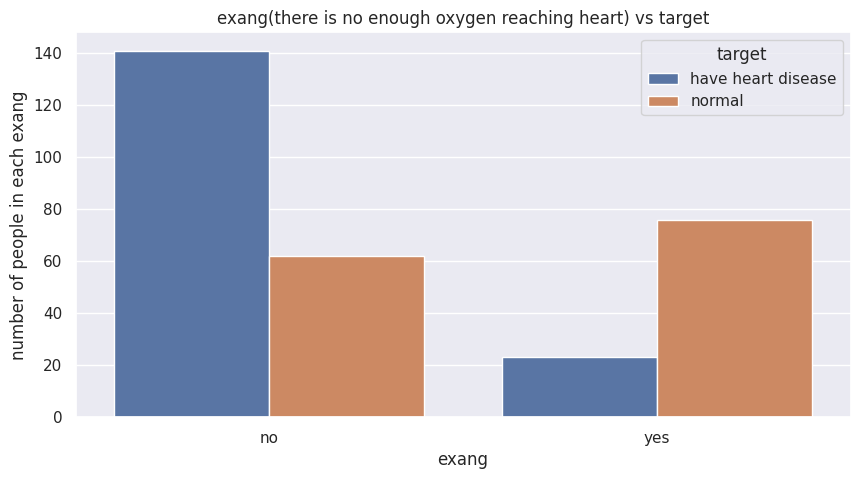

In [24]:
# i want to see effect of exang on heart diseases
df.replace({'exang':{0:'no',1:'yes'}},inplace=True)
plt.figure(figsize=(10,5))
sns.countplot(x='exang',hue='target',data=df)
plt.xlabel("exang")
plt.ylabel("number of people in each exang")
plt.title('exang(there is no enough oxygen reaching heart) vs target')
plt.show();

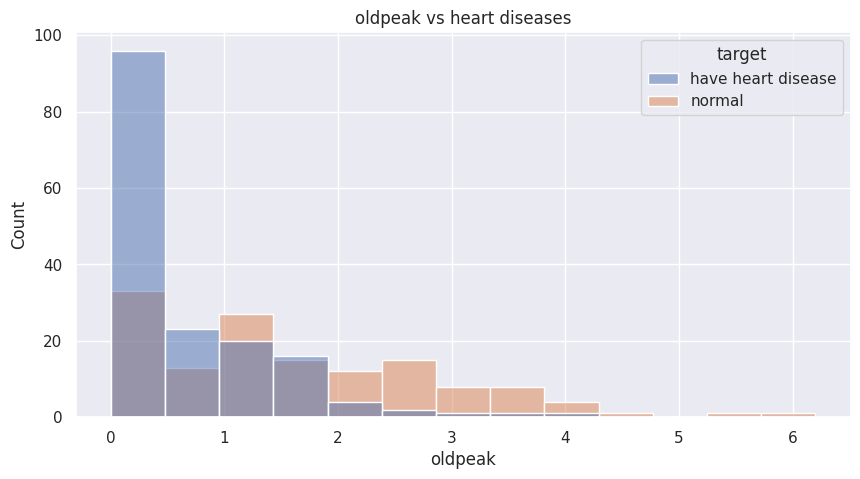

In [25]:
# i want to see oldpeak which mean there no enough blood reaching heart
plt.figure(figsize=(10,5))
sns.histplot(x=df['oldpeak'],hue=df['target'])
plt.title('oldpeak vs heart diseases')
plt.show();

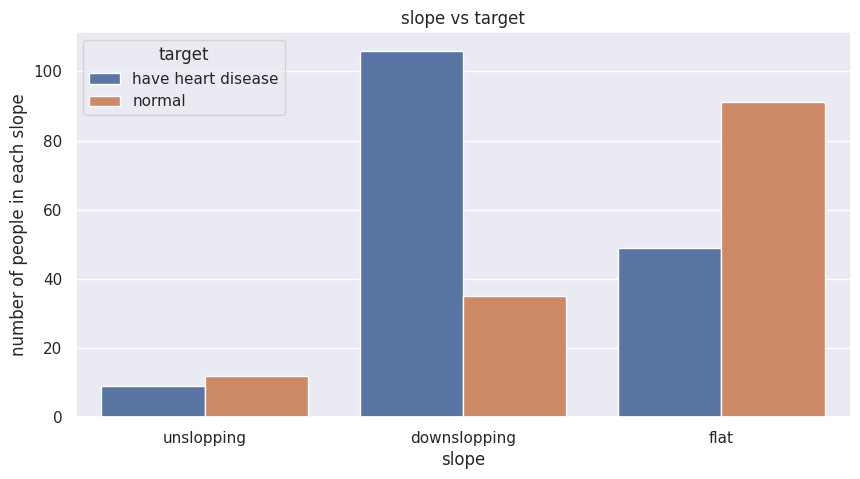

In [26]:
# now iwill see slope 0:unslopping ,1:flat and 2:downslopping and more resson for heart diseases are flat and downslopping
df.replace({'slope':{0:'unslopping',1:'flat',2:'downslopping'}},inplace=True)
plt.figure(figsize=(10,5))
sns.countplot(x='slope',hue='target',data=df)
plt.xlabel("slope")
plt.ylabel("number of people in each slope")
plt.title('slope vs target')
plt.show();

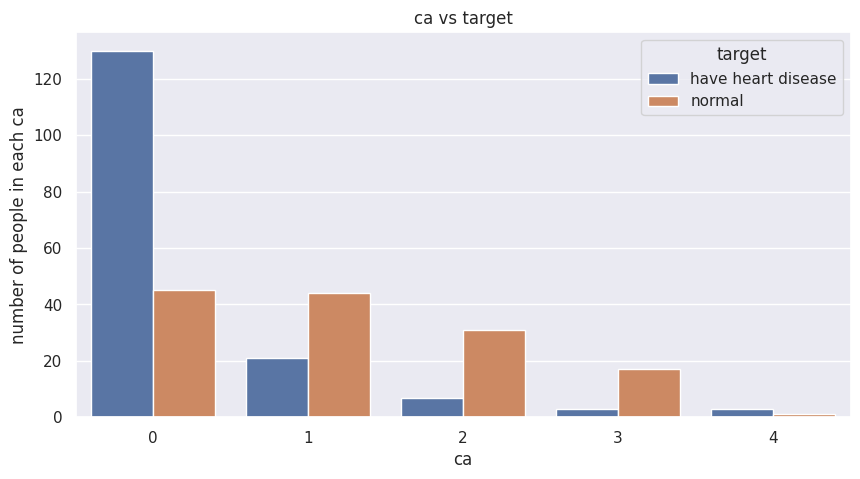

In [27]:
# now will see ca (number of colored major vessels by fluroscopy) and its range from 0 to 3 and as it increase there is more resson for heart disease
plt.figure(figsize=(10,5))
sns.countplot(x='ca',hue='target',data=df)
plt.xlabel("ca")
plt.ylabel("number of people in each ca")
plt.title('ca vs target')
plt.show();

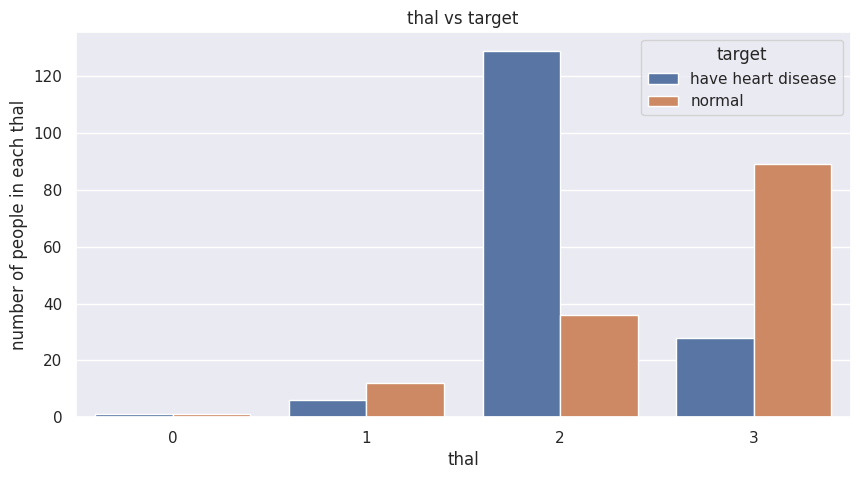

In [28]:
# lastly we will discover thal
plt.figure(figsize=(10,5))
sns.countplot(x='thal',hue='target',data=df)
plt.xlabel("thal")
plt.ylabel("number of people in each thal")
plt.title('thal vs target')
plt.show();

In [29]:
# i will use df2 which is copy of df to create our model
df_.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


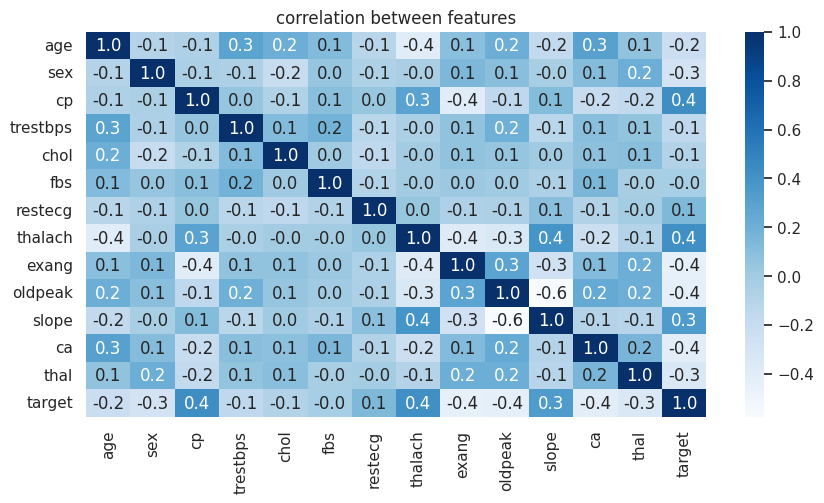

In [30]:
plt.figure(figsize=(10,5))
corr=df_.corr()
sns.heatmap(corr,annot=True,fmt='.1f',cmap='Blues')
plt.title("correlation between features")
plt.show();

In [33]:
x=df_.drop(columns=['target'])
y=df_['target']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.2, random_state=2,stratify=y)

In [36]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(241, 13) (61, 13) (241,) (61,)


In [37]:
model=LogisticRegression()

In [38]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
predict=model.predict(X_test)

In [40]:
# test accuracy
accuracy_score(Y_test,predict)

0.819672131147541

In [41]:
# train accuracy
accuracy_score(Y_train,model.predict(X_train))

0.8506224066390041

In [65]:
# bulinding predictive system
def predict_heart_disease():
    name=input("enter your name: ")
    age=int(input("enter your age: "))
    sex=int(input("enter your gender (male:1 or female:0): "))
    cp=int(input("enter your chest pain (asymptomatic:0,typical angina:1,atypical angina:2,non-angina:3): "))
    trestbps=int(input("enter your resting blood pressure: "))
    chol=int(input("enter your cholestrol: "))
    fbs=int(input("enter your festing blood pressure (normal:0,dibates:1): "))
    restecg=int(input("enter your restecg (normal:0,ST-T wave abnormality:1,left ventricular hypertrophy:2): "))
    thalach=int(input("enter your max heart rate reached during exrecise: "))
    exang=int(input("enter your exang (no:0,yes:1): "))
    oldpeak=float(input("enter your oldpeak which mean there no enough blood reaching heart: "))
    slope=int(input("enter your slope (unslopping:0,flat:1,downslopping:2): "))
    ca=int(input("enter your ca (number of colored major vessels by fluroscopy): "))
    thal=int(input("enter your thal (fixed:3,reversible:6,normal:7): "))
    # change input into numpy array
    input_data=np.asarray(l)
    # reshape input data to predict for only it not whole df
    input_data=input_data.reshape(1,-1)
    prediction=model.predict(input_data)
    if prediction[0]==1:
      print(f"sorry {name} you have heart disease")
    else:
      print(f"{name} you dont have heart disease")
predict_heart_disease()

enter your name: seif
enter your age: 63
enter your gender (male:1 or female:0): 1
enter your chest pain (asymptomatic:0,typical angina:1,atypical angina:2,non-angina:3): 2
enter your resting blood pressure: 120
enter your cholestrol: 3
enter your festing blood pressure (normal:0,dibates:1): 0
enter your restecg (normal:0,ST-T wave abnormality:1,left ventricular hypertrophy:2): 1
enter your max heart rate reached during exrecise: 120
enter your exang (no:0,yes:1): 0
enter your oldpeak which mean there no enough blood reaching heart: 2.3
enter your slope (unslopping:0,flat:1,downslopping:2): 1
enter your ca (number of colored major vessels by fluroscopy): 3
enter your thal (fixed:3,reversible:6,normal:7): 6
seif you dont have heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
